In [1]:
import os
import sys
sys.path.append('/Users/guns/Documents/GitHub/storage_python')  # my_apikeys.py 파일이 있는 경로
import my_apikeys as mykeys
import urllib.request
import pandas as pd
import json

# 네이버에서 발급받은 클라이언트 ID와 시크릿을 사용
client_id = mykeys.client_id
client_secret = mykeys.client_secret

# 파라미터 설정
display_count = 100     # 한 페이지에 표시할 검색 결과 수
num_data = 1000         # 검색할 데이터 개수
sort = 'date'           # 정렬 기준 (date: 날짜순, sim: 유사도순)

# 검색할 단어와 URL 설정
# encText = urllib.parse.quote("K팝 데몬헌터스"| "케데헌"| "K-pop Demon Hunters")
query = "K팝 데몬헌터스 OR 케데헌 OR K-pop Demon Hunters"
encText = urllib.parse.quote(query)

# 결과를 저장할 list 생성
results = []

# for문을 사용하여 검색 결과를 페이지별로 요청
for idx in range(1, num_data + 1, display_count):

    # JSON 결과 요청 URL 생성
    url = (
        "https://openapi.naver.com/v1/search/news?query="
        + encText
        + f"&start={idx}&display={display_count}&sort={sort}"
    )

    # 요청 객체 생성
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)

    # 요청 보내서 응답 받기
    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if rescode == 200:  # 응답 코드가 200이면 성공
        # 응답 본문을 읽음
        response_body = response.read()
        # response_body는 바이트 문자열이므로 decode를 통해 문자열로 변환
        response_dict = json.loads(response_body.decode('utf-8'))
        # dictionary에서 'items' 키를 사용하여 뉴스 기사 목록을 가져옴
        results = results + response_dict['items']
    else:
        print("Error Code:", rescode)

# 데이터 개수 확인
print(f"총 데이터 개수: {len(results)}")

# 일부 데이터 출력
results[:3]
from datetime import datetime
import re

# 저장할 빈 데이터프레임 생성
df = pd.DataFrame()

# 문자열에서 제거할 tag를 지정
remove_tags = re.compile(r'<.*?>')  # HTML 태그 제거를 위한 정규표현식

# 검색 결과에서 필요한 정보 추출
for item in results:
    # 각 뉴스 기사에서 필요한 정보 추출
    new_data = pd.DataFrame(
        data={
            # 날짜는 datetime 객체로 변환
            'pubDate': datetime.strptime(
                item['pubDate'],
                "%a, %d %b %Y %H:%M:%S +0900"
            ),
            'title': re.sub(remove_tags, '', item['title']),
            'description': re.sub(remove_tags, '', item['description'])
        },
        index=[0]  # index를 0으로 설정하여 단일 행 데이터프레임 생성
    )

    # 데이터프레임에 추가
    df = pd.concat([df, new_data], ignore_index=True)

# 데이터프레임 출력
df.head()

총 데이터 개수: 8


,pubDate,title,description
0,2025-12-11 08:02:00,2025 가장 많이 언급된 화제의 키워드(5),K-POP DEMON HUNTERS K-팝과 우리나라 전통 무속이 결합한 넷플릭스 ...
1,2025-12-03 13:28:00,"유튜브 2025 연말 결산, 최고 인기곡 케데헌 ‘Golden’..크리에이터 1위...",&quot;K-pop Demon Hunters&quot; stands out in ...
2,2025-10-16 16:53:00,“서울의 핵심 정체성은 ‘예술의 영향력’”,‘케이팝 데몬 헌터스’(케데헌)가 또다시 세계인의 마음을 사로잡고 있다.... fa...
3,2025-10-10 00:00:00,"트와이스, 10년째 '우상향 궤적'…&quot;K팝 걸그룹 '진화 방식'의 산증인&...",케이팝 데몬 헌터스(KPop Demon Hunters·케데헌)'는 그래서 트와이스의...
4,2025-09-29 15:16:00,"'케데헌' 광풍에 안효섭, 美 CBS 뉴스 생중계 출연…&quot;이제는 월드스타&...",애니메이션계의 새로운 역사를 쓴 영화 '케이팝 데몬 헌터스(KPop Demon Hu...


In [2]:
df.to_csv(
    "/Users/guns/Desktop/KDH.csv",
    index=False,
    encoding="utf-8-sig"
)

In [3]:
df.head()

,pubDate,title,description
0,2025-12-11 08:02:00,2025 가장 많이 언급된 화제의 키워드(5),K-POP DEMON HUNTERS K-팝과 우리나라 전통 무속이 결합한 넷플릭스 ...
1,2025-12-03 13:28:00,"유튜브 2025 연말 결산, 최고 인기곡 케데헌 ‘Golden’..크리에이터 1위...",&quot;K-pop Demon Hunters&quot; stands out in ...
2,2025-10-16 16:53:00,“서울의 핵심 정체성은 ‘예술의 영향력’”,‘케이팝 데몬 헌터스’(케데헌)가 또다시 세계인의 마음을 사로잡고 있다.... fa...
3,2025-10-10 00:00:00,"트와이스, 10년째 '우상향 궤적'…&quot;K팝 걸그룹 '진화 방식'의 산증인&...",케이팝 데몬 헌터스(KPop Demon Hunters·케데헌)'는 그래서 트와이스의...
4,2025-09-29 15:16:00,"'케데헌' 광풍에 안효섭, 美 CBS 뉴스 생중계 출연…&quot;이제는 월드스타&...",애니메이션계의 새로운 역사를 쓴 영화 '케이팝 데몬 헌터스(KPop Demon Hu...


In [4]:
import os
print(os.getcwd())

/Users/guns/Desktop/시각화 3차 


In [5]:
from wordcloud import STOPWORDS
import pandas as pd
from itertools import combinations
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import koreanize_matplotlib
import re
from konlpy.tag import Okt

# description 컬럼의 데이터를 리스트로 변환
descriptions = df['description'].tolist()

# Okt 객체 생성
okt = Okt()

# 불용어 사전 불러오기
with open('/Users/guns/Documents/GitHub/storage_python/stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = f.read().splitlines()

# 불용어 사전 추가
stopwords.extend(
    []
)

# 각 문자열을 정제 -> 명사 추출 -> 불용어 제거
all_nouns = []
for i, text in enumerate(descriptions):
    # 정제: 한글과 공백을 제외한 모든 문자 제거
    text_cleaned = re.sub(r'[^가-힣\s]', '', text)
    # 형태소 분리 후 명사만 추출
    nouns = okt.nouns(text_cleaned)
    # 한 글자 단어 및 불용어 제거
    nouns = [word for word in set(nouns) if (len(word) > 1) and (word not in stopwords)]
    # 전처리된 단어목록을 all_nouns에 추가
    all_nouns.append(nouns)

# 앞의 5개 목록 출력
print(f'전처리된 단어 목록: {all_nouns[:5]}')

전처리된 단어 목록: [['무속', '전통', '결합', '추격', '데몬', '애니메이션', '골든', '주제곡', '테일러', '데헌', '역시', '린지', '헌터', '지구', '케이팝', '우리나라', '스위프트', '넷플릭스', '곳곳', '스케'], [], ['데몬', '데헌', '마음', '세계', '헌터', '스케', '케이팝'], ['서사', '케데헌는', '데몬', '그대로', '오어', '시기', '애니메이션', '헌터스', '서머', '트와이스', '케이팝', '예스'], ['데몬', '영화', '넷플릭스', '상상', '역사', '애니메이션', '헌터스', '케이팝']]


In [6]:
output_filename = 'all_processed_nouns.txt'

with open(output_filename, 'w', encoding='utf-8') as f:
    for nouns in all_nouns:
        f.write(','.join(nouns) + '\n')

In [7]:
# edge 리스트 생성
edge_list = []

# 각 문서의 명사 목록에서 2-튜플 조합 생성
for nouns in all_nouns:
    if len(nouns) > 1:  # 단어가 2개 이상인 경우에만 처리
        # 사전식으로 정렬한 후 조합을 생성하여 edge_list에 추가
        edge_list.extend(combinations(sorted(nouns), 2))

# 생성된 edge 리스트의 중복 개수를 계산
edge_counts = Counter(edge_list)

# 가장 많이 등장한 10개의 엣지 출력
print(edge_counts.most_common(10))


# 지정된 최소 빈도 이상의 엣지만 필터링
min_count = 1
filtered_edges = {
    edge: weight
    for edge, weight in edge_counts.items()
    if weight >= min_count
}

# 전체 edge 개수 출력
print(f'필터링된 엣지 개수: {len(filtered_edges)}')

# 가장 가중치가 높은 엣지 10개 출력
print(
    f'가장 가중치가 높은 edge 10개:\n'
    f'{sorted(filtered_edges.items(), key=lambda x: x[1], reverse=True)[:10]}'
)

[(('데몬', '케이팝'), 6), (('데몬', '애니메이션'), 4), (('애니메이션', '케이팝'), 4), (('데몬', '헌터스'), 4), (('케이팝', '헌터스'), 4), (('넷플릭스', '데몬'), 3), (('넷플릭스', '애니메이션'), 3), (('넷플릭스', '케이팝'), 3), (('애니메이션', '헌터스'), 3), (('데몬', '데헌'), 2)]
필터링된 엣지 개수: 340
가장 가중치가 높은 edge 10개:
[(('데몬', '케이팝'), 6), (('데몬', '애니메이션'), 4), (('애니메이션', '케이팝'), 4), (('데몬', '헌터스'), 4), (('케이팝', '헌터스'), 4), (('넷플릭스', '데몬'), 3), (('넷플릭스', '애니메이션'), 3), (('넷플릭스', '케이팝'), 3), (('애니메이션', '헌터스'), 3), (('데몬', '데헌'), 2)]


In [8]:
import pandas as pd

edges_df = (
    pd.DataFrame(
        [(a, b, w) for (a, b), w in filtered_edges.items()],
        columns=["source", "target", "weight"]
    )
    .sort_values("weight", ascending=False)
    .reset_index(drop=True)
)

edges_df.to_csv("filtered_edges.csv", index=False, encoding="utf-8-sig")

In [9]:
df1 = pd.read_csv('/Users/guns/Documents/GitHub/storage_python/filtered_edges.csv')
df1.head()

,source,target,weight
0,데몬,케이팝,6
1,애니메이션,케이팝,4
2,케이팝,헌터스,4
3,데몬,헌터스,4
4,데몬,애니메이션,4


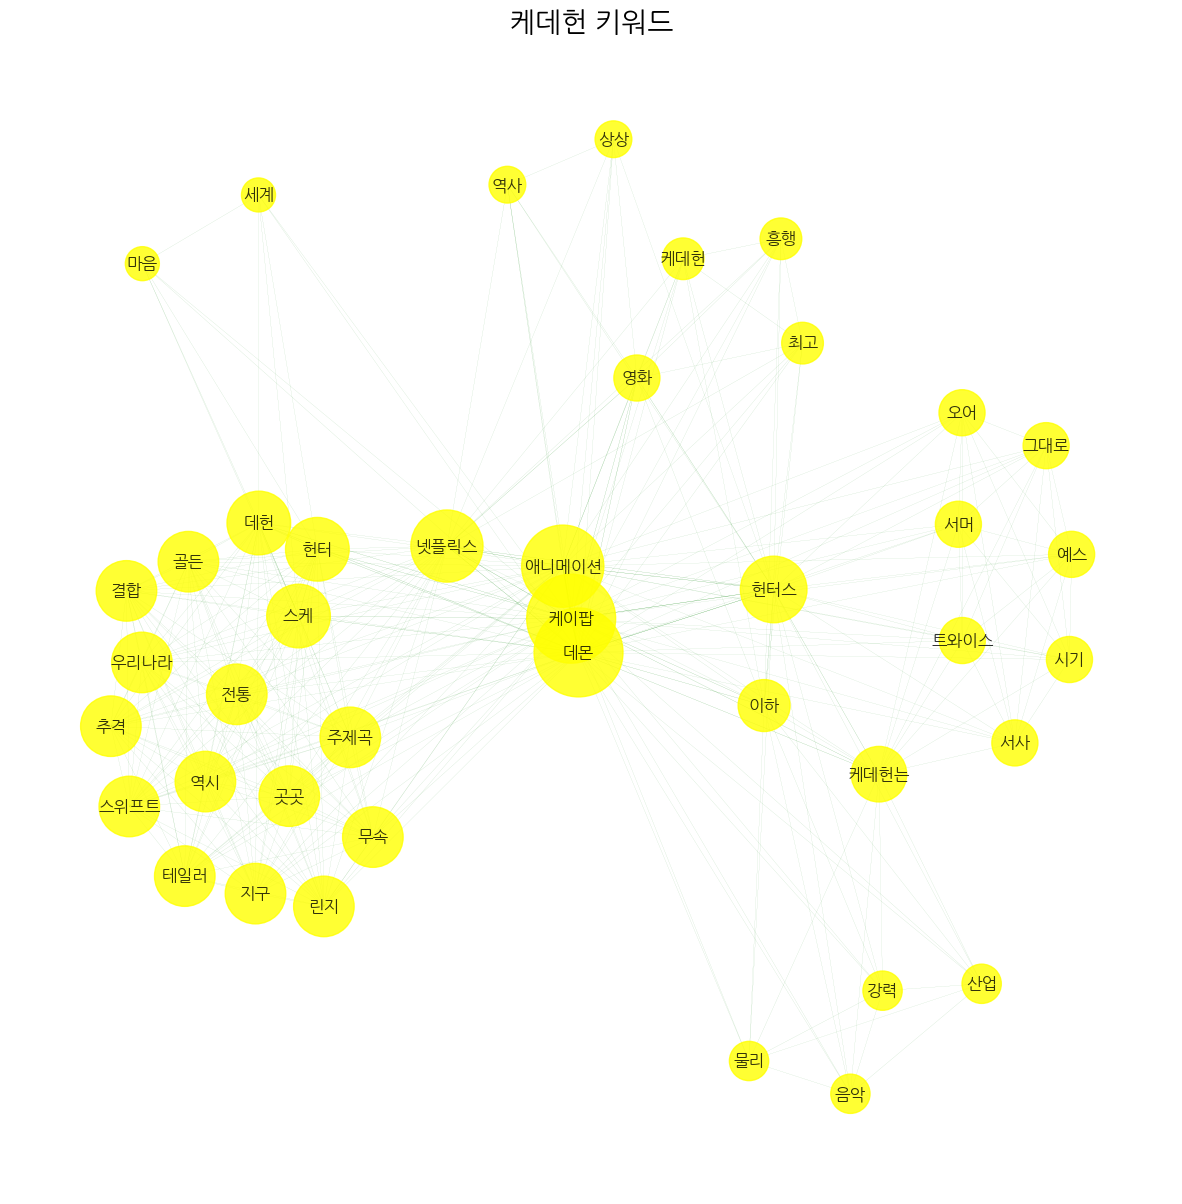

In [10]:
# 네트워크 그래프 생성
G = nx.Graph()

# 가중치가 포함된 엣지 리스트 생성
weighted_edges = [
    (node1, node2, weight)
    for (node1, node2), weight in filtered_edges.items()
]

# 엣지와 가중치 추가
G.add_weighted_edges_from(weighted_edges)


# =========================
# 네트워크 그래프 시각화
# spring_layout을 사용한 시각화
# =========================

# 레이아웃 생성
pos_spring = nx.spring_layout(
    G,              # 그래프 객체
    k=0.3,           # 노드 간격 조절 파라미터
    iterations=50,   # 반복 횟수
    seed=42
)

# 노드 크기 설정 (차수 기반)
node_sizes = [G.degree(node) * 100 for node in G.nodes()]

# 엣지 두께 설정 (가중치 기반)
edge_widths = [G[u][v]['weight'] * 0.05 for u, v in G.edges()]

# 그래프 그리기
plt.figure(figsize=(15, 15))

network_chart = nx.draw_networkx(
    G,
    pos_spring,
    with_labels=True,
    node_size=node_sizes,
    width=edge_widths,
    font_family=plt.rcParams['font.family'],
    font_size=12,
    node_color='yellow',
    edge_color='green',
    alpha=0.8
)

plt.title('케데헌 키워드', size=20)
plt.axis('off')
plt.savefig('/Users/guns/Desktop/케데헌.png', format='PNG', dpi=300)
plt.show()

In [11]:
print(G.number_of_nodes(), G.number_of_edges())

42 340


## 노드 색상 다르게 
- 아래 링크의 코드 참고함
https://www.mindscale.kr/course/python-network-analysis/19

In [12]:
# import networkx as nx
# from matplotlib import pyplot

# G = nx.Graph()

# pos = nx.spring_layout(G, k=0.2, seed = 42)

# high_degree = []
# low_degree = []
# for node, deg in nx.degree(G):
#     if deg > :
#         high_degree.append(node)
#     else:
#         low_degree.append(node)

# high_subnet = G.subgraph(high_degree)
# low_subnet = G.subgraph(low_degree)


# # 그림 크기를 가로 12, 세로 10으로 설정
# pyplot.rcParams['figure.figsize'] = (12, 10)  

# # 차수가 높은 노드를 크기 2000, 핑크색으로 그린다
# nx.draw_networkx_nodes(high_subnet, pos=pos, node_size=2000, node_color='pink') 

# # 차수가 높은 노드의 글씨를 크기 15, 빨간색으로 쓴다
# nx.draw_networkx_labels(high_subnet, pos=pos, font_size=15, font_color='red')

# # 차수가 낮은 노드를 크기 300, 회색으로 그린다
# nx.draw_networkx_nodes(low_subnet, pos=pos, node_size=300, node_color='grey')

# # 차수가 낮은 노드의 글씨를 크기 9, 검은색으로 쓴다
# nx.draw_networkx_labels(low_subnet, pos=pos, font_size=9, font_color='black')

# # 그래프 전체의 에지를 밝은 회색으로 그린다
# nx.draw_networkx_edges(G, pos=pos, edge_color='lightgrey')


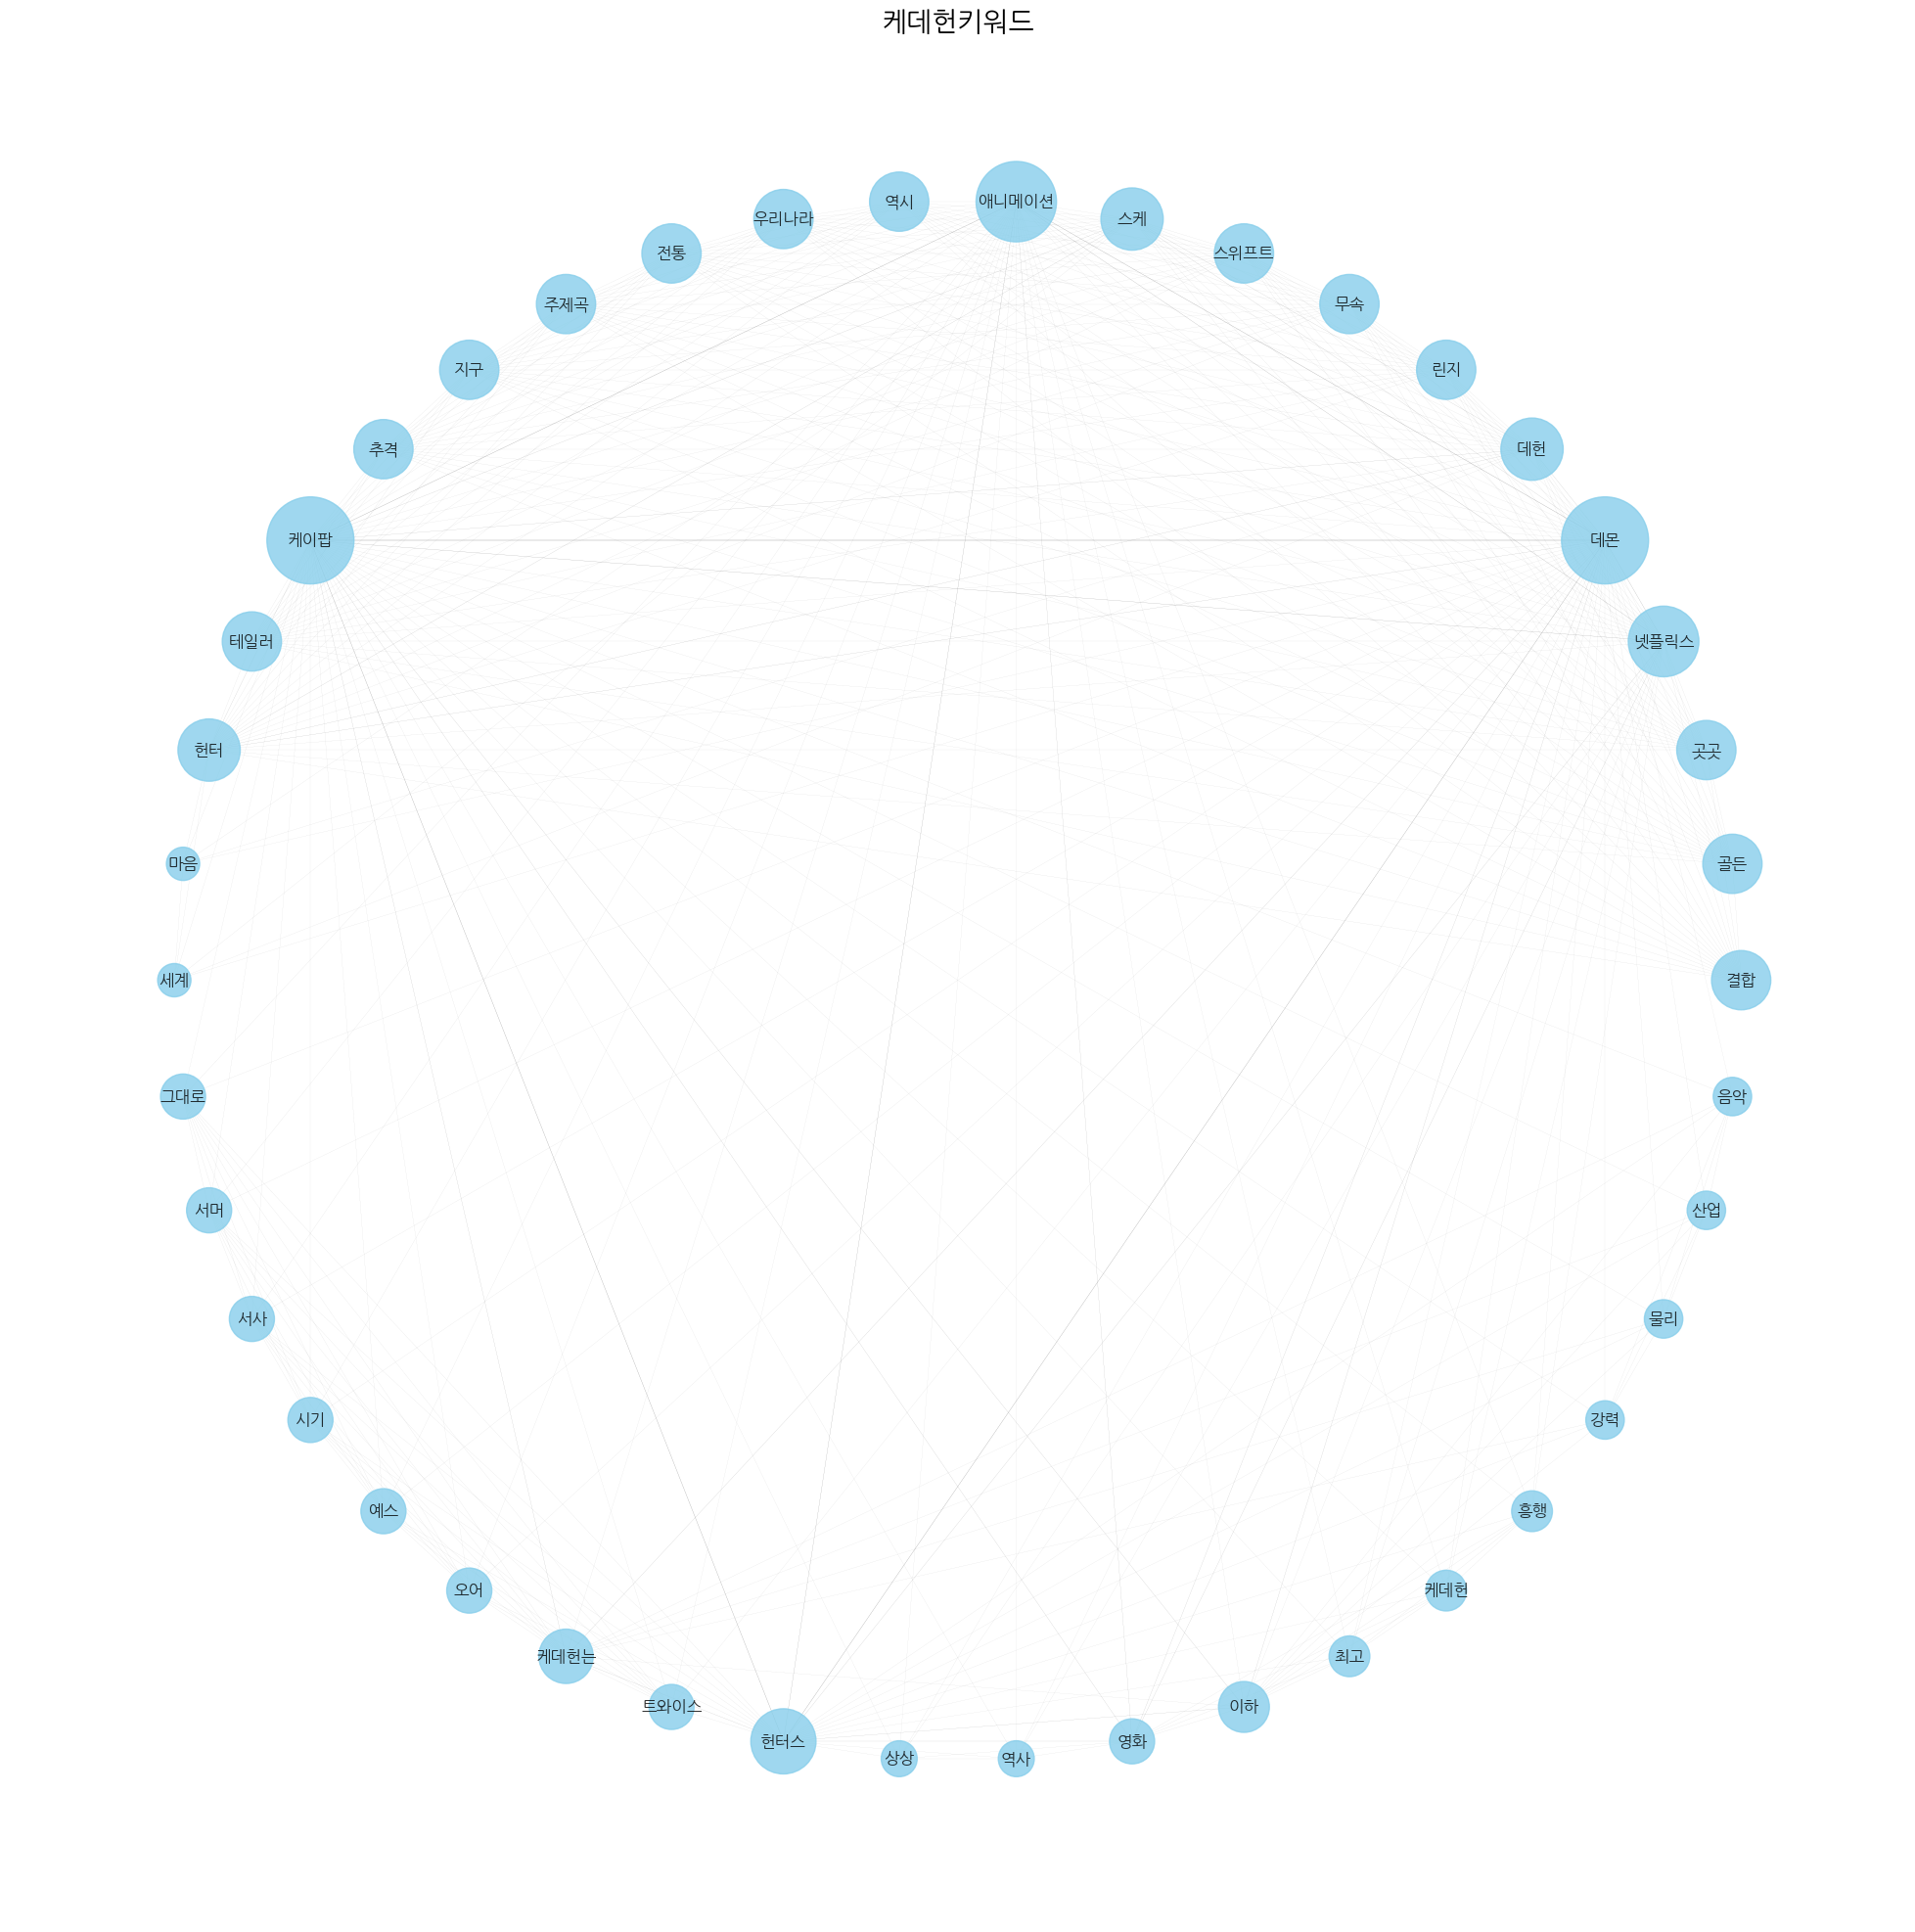

In [13]:
# circular_layout을 사용한 시각화

# 레이아웃 생성
pos_circular = nx.circular_layout(G)

# 노드 크기 설정 (차수 기반)
node_sizes = [G.degree(node) * 100 for node in G.nodes()]

# 엣지 두께 설정 (가중치 기반)
edge_widths = [G[u][v]['weight'] * 0.05 for u, v in G.edges()]

# 그래프 그리기
plt.figure(figsize=(25, 25))

nx.draw_networkx(
    G,
    pos_circular,
    with_labels=True,
    node_size=node_sizes,
    width=edge_widths,
    font_family=plt.rcParams['font.family'],
    font_size=12,
    node_color='skyblue',
    edge_color='gray',
    alpha=0.8
)

plt.title('케데헌키워드', size=20)
plt.axis('off')
plt.show()

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [15]:
from wordcloud import WordCloud
from collections import Counter

flat = [w for doc in all_nouns for w in doc]
freq = Counter(flat)

wc = WordCloud(font_path='/Users/guns/Documents/GitHub/storage_python/Apple 산돌고딕 Neo/AppleSDGothicNeoB.ttf').generate_from_frequencies(freq)

In [16]:
print(wc)

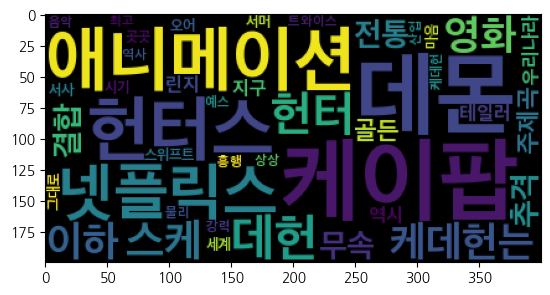

In [17]:
plt.imshow(wc);

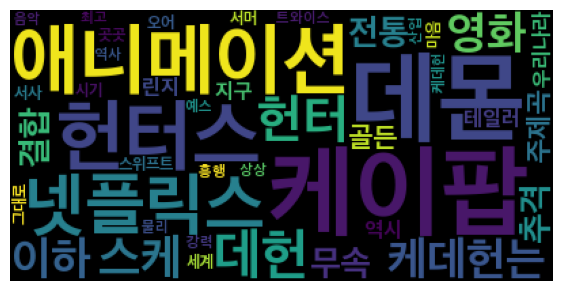

In [18]:
def showWordCloudBasic(wc):
    # 그래프 크기 설정
    plt.figure(figsize=(7,4))
    # wordcloud 객체를 넣으면 워드클라우드 형태의 그래프 생성
    plt.imshow(wc)
    plt.axis('off') #눈금 삭제
    plt.show()

showWordCloudBasic(wc)

In [19]:
# 스트림릿 참고 코드 
# https://durian9s-coding-tree.tistory.com/20